In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import Ridge

INPUT_FIELDS = [
    'CRITICALITY',
    'CONNECTIVITY',
    'RELIABILITY',
    'IMPORTANCE',
    'PROVIDED_INTERFACE',
    'REQUIRED_INTERFACE',
    'ADT',
    ' PMax',
    'alpha',
    'In Use REPLICA',
    'LOAD',
]
OUTPUT_FIELD = 'OPTIMAL_UTILITY'

data = pd.read_csv('../data/Traning_mRubis_Batch_1.csv').dropna(subset=['Shop'])[INPUT_FIELDS + [OUTPUT_FIELD]]

data['Linear'] = data['RELIABILITY'] * data['CRITICALITY'] * (data['PROVIDED_INTERFACE'] + data['REQUIRED_INTERFACE'])
data['Saturating'] = data['RELIABILITY'] * data['CRITICALITY'] * data[' PMax'] * np.tanh(data['alpha'] * data['In Use REPLICA'] / data['LOAD']) * (data['PROVIDED_INTERFACE'] + data['REQUIRED_INTERFACE'])
data

,CRITICALITY,CONNECTIVITY,RELIABILITY,IMPORTANCE,PROVIDED_INTERFACE,REQUIRED_INTERFACE,ADT,PMax,alpha,In Use REPLICA,LOAD,OPTIMAL_UTILITY,Linear,Saturating
0,25.0,4.0,0.5,22.0,0.0,4.0,1.077155,13.448238,126.901175,12.0,373.0,18480.555310,50.0,672.029563
1,24.0,2.0,0.5,22.0,1.0,1.0,1.175642,5.323259,154.197090,7.0,4586.0,4894.866505,24.0,29.526479
2,11.0,3.0,0.5,22.0,1.0,2.0,1.203442,13.462900,85.652412,18.0,377.0,9762.030924,16.5,222.013273
3,27.0,5.0,0.5,22.0,0.0,5.0,1.356134,8.060657,73.959463,14.0,241.0,14350.529590,67.5,543.892601
4,27.0,15.0,0.5,22.0,14.0,1.0,1.101619,6.164631,85.670351,24.0,500.0,51254.059050,202.5,1247.668828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,12.0,8.0,0.5,22.0,7.0,1.0,1.160442,5.886177,77.141379,0.0,0.0,8159.300469,48.0,NaN
196,30.0,4.0,0.5,22.0,0.0,4.0,1.460128,12.903071,167.792201,0.0,4586.0,18789.762880,60.0,0.000000
197,30.0,4.0,0.5,22.0,0.0,4.0,1.460128,12.903071,167.792201,38.0,4586.0,18789.762880,60.0,683.795060
198,16.0,9.0,0.5,22.0,8.0,1.0,1.267240,16.466418,88.501706,0.0,0.0,36096.032900,72.0,NaN


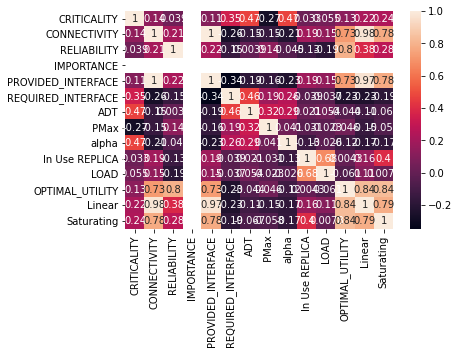

In [2]:
sn.heatmap(data.corr(), annot=True)
None

In [15]:
# NaNs are dropped here, because 'Saturating' might be NaN for rows with 'LOAD' == 0.0
data_cleaned = data.fillna({'Saturating': 0.0})

# 'IMPORTANCE' is dropped, because it is constant throughout the dataset
# 'CONNECTIVITY' is dropped, because it is perfectly correlated with 'PROVIDED_INTERFACE'
X = data_cleaned[INPUT_FIELDS + ['Linear', 'Saturating']].drop(['IMPORTANCE', 'CONNECTIVITY'], axis=1)
y = data_cleaned[OUTPUT_FIELD]

X_linear = X.drop('Saturating', axis=1)
X_saturating = X.drop('Linear', axis=1)

In [10]:
X_linear

,CRITICALITY,CONNECTIVITY,RELIABILITY,IMPORTANCE,PROVIDED_INTERFACE,REQUIRED_INTERFACE,ADT,PMax,alpha,In Use REPLICA,LOAD,Linear
0,25.0,4.0,0.5,22.0,0.0,4.0,1.077155,13.448238,126.901175,12.0,373.0,50.0
1,24.0,2.0,0.5,22.0,1.0,1.0,1.175642,5.323259,154.197090,7.0,4586.0,24.0
2,11.0,3.0,0.5,22.0,1.0,2.0,1.203442,13.462900,85.652412,18.0,377.0,16.5
3,27.0,5.0,0.5,22.0,0.0,5.0,1.356134,8.060657,73.959463,14.0,241.0,67.5
4,27.0,15.0,0.5,22.0,14.0,1.0,1.101619,6.164631,85.670351,24.0,500.0,202.5
...,...,...,...,...,...,...,...,...,...,...,...,...
195,12.0,8.0,0.5,22.0,7.0,1.0,1.160442,5.886177,77.141379,0.0,0.0,48.0
196,30.0,4.0,0.5,22.0,0.0,4.0,1.460128,12.903071,167.792201,0.0,4586.0,60.0
197,30.0,4.0,0.5,22.0,0.0,4.0,1.460128,12.903071,167.792201,38.0,4586.0,60.0
198,16.0,9.0,0.5,22.0,8.0,1.0,1.267240,16.466418,88.501706,0.0,0.0,72.0


In [11]:
X_saturating

,CRITICALITY,CONNECTIVITY,RELIABILITY,IMPORTANCE,PROVIDED_INTERFACE,REQUIRED_INTERFACE,ADT,PMax,alpha,In Use REPLICA,LOAD,Saturating
0,25.0,4.0,0.5,22.0,0.0,4.0,1.077155,13.448238,126.901175,12.0,373.0,672.029563
1,24.0,2.0,0.5,22.0,1.0,1.0,1.175642,5.323259,154.197090,7.0,4586.0,29.526479
2,11.0,3.0,0.5,22.0,1.0,2.0,1.203442,13.462900,85.652412,18.0,377.0,222.013273
3,27.0,5.0,0.5,22.0,0.0,5.0,1.356134,8.060657,73.959463,14.0,241.0,543.892601
4,27.0,15.0,0.5,22.0,14.0,1.0,1.101619,6.164631,85.670351,24.0,500.0,1247.668828
...,...,...,...,...,...,...,...,...,...,...,...,...
195,12.0,8.0,0.5,22.0,7.0,1.0,1.160442,5.886177,77.141379,0.0,0.0,0.000000
196,30.0,4.0,0.5,22.0,0.0,4.0,1.460128,12.903071,167.792201,0.0,4586.0,0.000000
197,30.0,4.0,0.5,22.0,0.0,4.0,1.460128,12.903071,167.792201,38.0,4586.0,683.795060
198,16.0,9.0,0.5,22.0,8.0,1.0,1.267240,16.466418,88.501706,0.0,0.0,0.000000


In [12]:
y

0      18480.555310
1       4894.866505
2       9762.030924
3      14350.529590
4      51254.059050
           ...     
195     8159.300469
196    18789.762880
197    18789.762880
198    36096.032900
199    29132.737840
Name: OPTIMAL_UTILITY, Length: 200, dtype: float64

Linear:
Mean Squared Error = 271540272.90


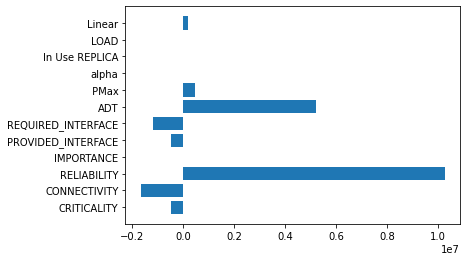

In [13]:
errors = []
parameters = []
for train_index, test_index in LeaveOneOut().split(X_linear, y):
    X_train, X_test = X_linear.values[train_index], X_linear.values[test_index]
    y_train, y_test = y.values[train_index], y.values[test_index]
    ridge = Ridge()
    ridge.fit(X_train, y_train)
    errors.append(ridge.predict(X_test) - y_test)
    parameters.append(ridge.coef_)
print(
    f'Linear:\n'
    f'Mean Squared Error = {np.average(np.square(errors)):0.2f}'
)
plt.barh(X_linear.columns, pd.DataFrame(parameters).sum())
plt.show()

Linear:
Mean Squared Error = 271329476.28


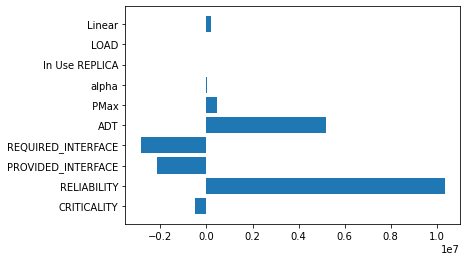

In [16]:
errors = []
parameters = []
for train_index, test_index in LeaveOneOut().split(X_linear, y):
    X_train, X_test = X_linear.values[train_index], X_linear.values[test_index]
    y_train, y_test = y.values[train_index], y.values[test_index]
    ridge = Ridge()
    ridge.fit(X_train, y_train)
    errors.append(ridge.predict(X_test) - y_test)
    parameters.append(ridge.coef_)
print(
    f'Linear:\n'
    f'Mean Squared Error = {np.average(np.square(errors)):0.2f}'
)
plt.barh(X_linear.columns, pd.DataFrame(parameters).sum())
plt.show()

Saturating model:
Mean Squared Error = 676879448.35


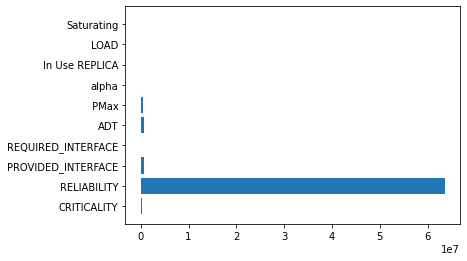

In [8]:
errors = []
parameters = []
for train_index, test_index in LeaveOneOut().split(X_saturating, y):
    X_train, X_test = X_saturating.values[train_index], X_saturating.values[test_index]
    y_train, y_test = y.values[train_index], y.values[test_index]
    ridge = Ridge()
    ridge.fit(X_train, y_train)
    errors.append(ridge.predict(X_test) - y_test)
    parameters.append(ridge.coef_)
print(
    f'Saturating model:\n'
    f'Mean Squared Error = {np.average(np.square(errors)):0.2f}'
)
plt.barh(X_saturating.columns, pd.DataFrame(parameters).sum())
plt.show()
